# **Superstore_Project**



**Import Libraries & Load Data**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
try:
    df = pd.read_csv('/content/Sample - Superstore.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('/content/Sample - Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [3]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Data Cleaning**



In [4]:
df.info()

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

print("Missing Values:\n", df.isnull().sum())

print(f"Duplicates found: {df.duplicated().sum()}")

df.drop_duplicates(inplace=True)

if 'Row ID' in df.columns:
    df.drop(columns=['Row ID'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

**Exploratory Data Analysis (EDA)**





**A. Sales Trend Over Time**



/tmp/ipython-input-4065449523.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()


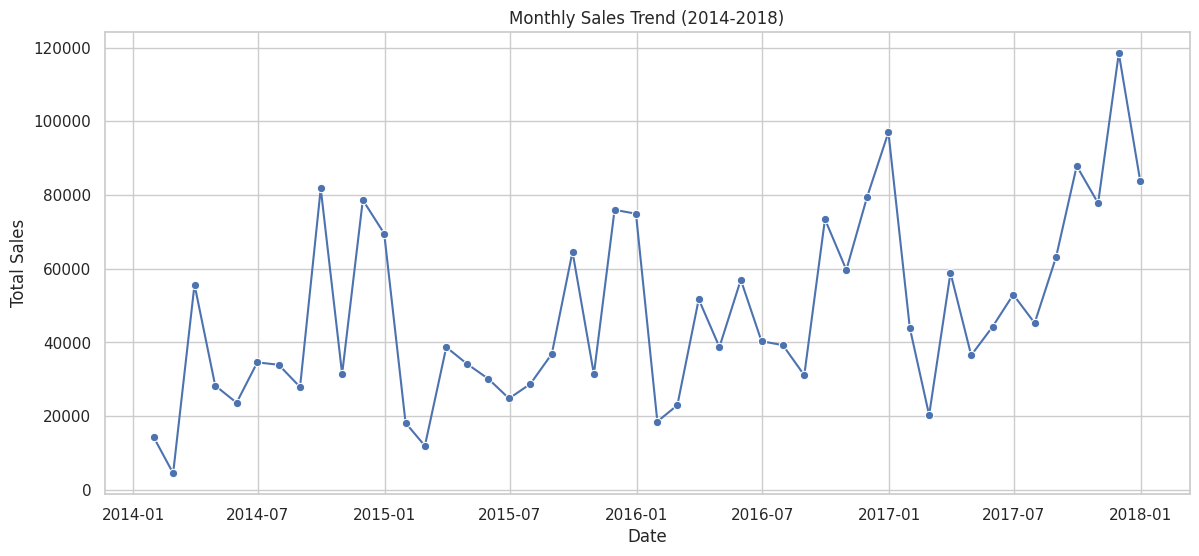

In [5]:
monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, marker='o', color='b')
plt.title("Monthly Sales Trend (2014-2018)")
plt.ylabel("Total Sales")
plt.xlabel("Date")
plt.show()

**B. Best Performing Categories**

/tmp/ipython-input-933729587.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=cat_sales, palette='viridis')


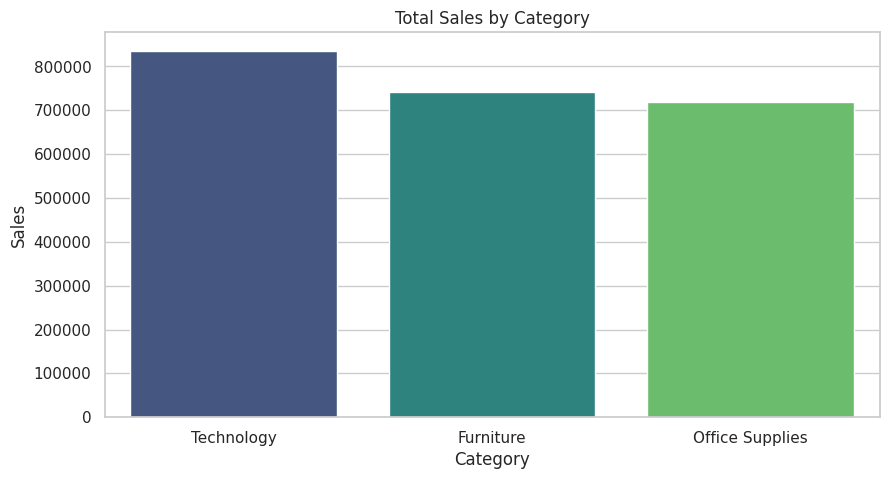

In [6]:
cat_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Sales', data=cat_sales, palette='viridis')
plt.title("Total Sales by Category")
plt.show()

**C. Profit vs. Discount (Crucial for Business Logic)**

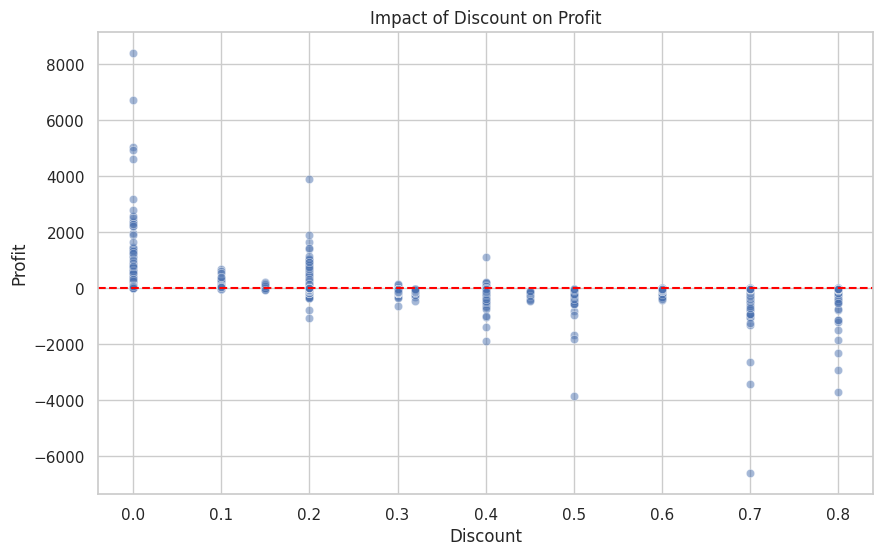

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.5)
plt.title("Impact of Discount on Profit")
plt.axhline(0, color='red', linestyle='--') # Zero profit line
plt.show()

**D. Correlation Heatmap**

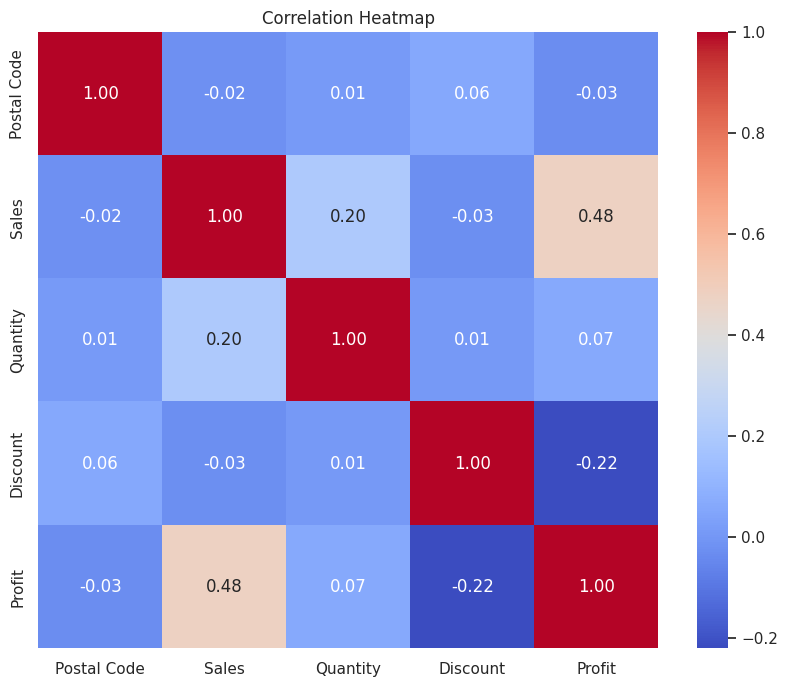

In [8]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [9]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [10]:
!git add .
!git commit -m "Day 1: Completed Data Cleaning and EDA"
!git branch -M main
# Add your remote origin here (e.g., git remote add origin https://github.com...)
# !git push -u origin main

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@b0ded7546903.(none)')


In [11]:
!git config --global user.email "siddharthsharma0633@gmail.com"
!git config --global user.name "SiddSynth"

# Feature Engineering

**Date Feature Extraction**

In [12]:
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Day'] = df['Order Date'].dt.day
df['Order_DayOfWeek'] = df['Order Date'].dt.dayofweek

df['Is_Weekend'] = df['Order_DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

df['Shipping_Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

print(df[['Order Date', 'Order_Month', 'Is_Weekend', 'Shipping_Duration']].head())

  Order Date  Order_Month  Is_Weekend  Shipping_Duration
0 2016-11-08           11           0                  3
1 2016-11-08           11           0                  3
2 2016-06-12            6           1                  4
3 2015-10-11           10           1                  7
4 2015-10-11           10           1                  7


**Categorical Encoding**

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['State_Encoded'] = le.fit_transform(df['State'])
df['City_Encoded'] = le.fit_transform(df['City'])
df['Sub_Category_Encoded'] = le.fit_transform(df['Sub-Category'])
df['Product_ID_Encoded'] = le.fit_transform(df['Product ID'])

encoded_df = pd.get_dummies(df, columns=['Category', 'Region', 'Segment', 'Ship Mode'], drop_first=True)

print("Original shape:", df.shape)
print("New shape:", encoded_df.shape)
encoded_df.head()

Original shape: (9994, 30)
New shape: (9994, 36)


,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Country,City,State,Postal Code,Product ID,...,Category_Office Supplies,Category_Technology,Region_East,Region_South,Region_West,Segment_Corporate,Segment_Home Office,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class
0,CA-2016-152156,2016-11-08,2016-11-11,CG-12520,Claire Gute,United States,Henderson,Kentucky,42420,FUR-BO-10001798,...,False,False,False,True,False,False,False,False,True,False
1,CA-2016-152156,2016-11-08,2016-11-11,CG-12520,Claire Gute,United States,Henderson,Kentucky,42420,FUR-CH-10000454,...,False,False,False,True,False,False,False,False,True,False
2,CA-2016-138688,2016-06-12,2016-06-16,DV-13045,Darrin Van Huff,United States,Los Angeles,California,90036,OFF-LA-10000240,...,True,False,False,False,True,True,False,False,True,False
3,US-2015-108966,2015-10-11,2015-10-18,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311,FUR-TA-10000577,...,False,False,False,True,False,False,False,False,False,True
4,US-2015-108966,2015-10-11,2015-10-18,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311,OFF-ST-10000760,...,True,False,False,True,False,False,False,False,False,True


**Handling Outliers (The IQR Method)**

In [14]:
Q1 = encoded_df['Sales'].quantile(0.25)
Q3 = encoded_df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

encoded_df['Sales_Capped'] = np.where(encoded_df['Sales'] > upper_bound, upper_bound, encoded_df['Sales'])

print(f"Capped Sales at upper bound: {upper_bound}")

Capped Sales at upper bound: 498.93


**Select Features for Modeling**

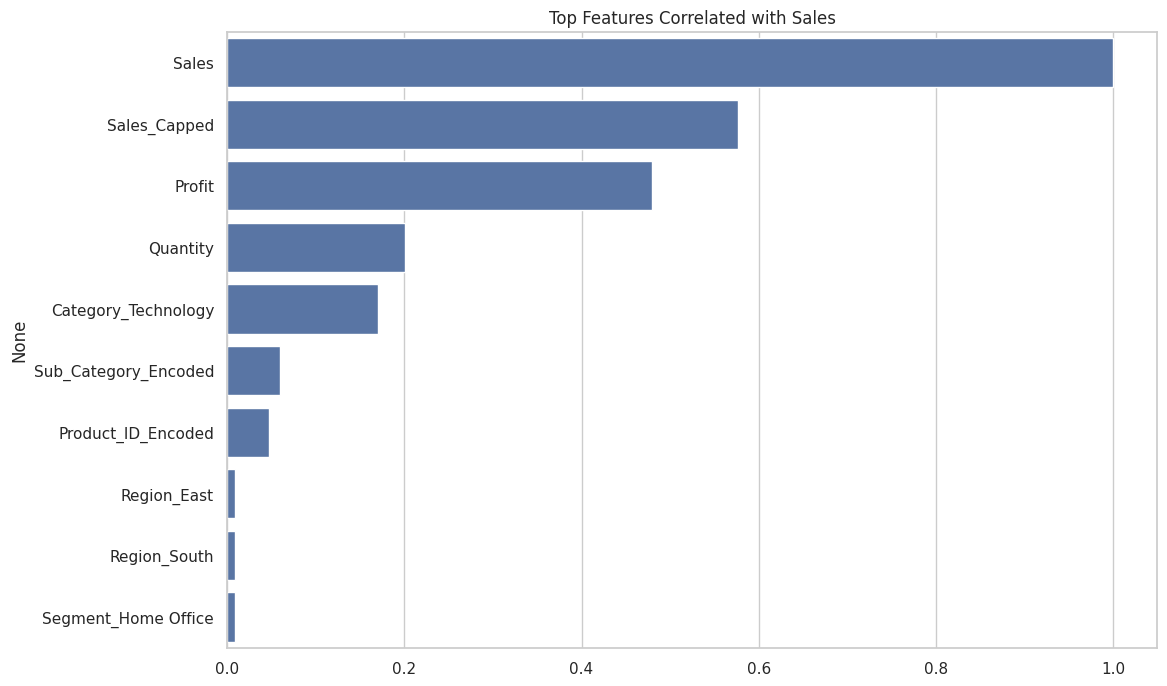

In [15]:
cols_to_drop = ['Order ID', 'Customer ID', 'Country', 'Customer Name', 'Product Name', 'Order Date', 'Ship Date', 'State', 'City', 'Sub-Category', 'Product ID']

model_df = encoded_df.drop(columns=cols_to_drop)

plt.figure(figsize=(12, 8))

correlation = model_df.corr()['Sales'].sort_values(ascending=False).head(10)
sns.barplot(x=correlation.values, y=correlation.index)
plt.title("Top Features Correlated with Sales")
plt.show()

**Save the Processed Data**


In [16]:
import os

# Create the 'data' directory if it doesn't exist
os.makedirs('data', exist_ok=True)

model_df.to_csv('data/superstore_model_ready.csv', index=False)
print("File saved: data/superstore_model_ready.csv")

File saved: data/superstore_model_ready.csv


# Build Baseline ML Model

**Split the Data**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
X = model_df.drop(columns=['Sales', 'Profit', 'Sales_Capped'], errors='ignore')
y = model_df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shapes: X={X_train.shape}, y={y_train.shape}")
print(f"Testing shapes:  X={X_test.shape},  y={y_test.shape}")

Training shapes: X=(7995, 23), y=(7995,)
Testing shapes:  X=(1999, 23),  y=(1999,)


**Train Linear Regression**

In [19]:
print('--- X_train info before fitting ---')
X_train.info()

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)



--- X_train info before fitting ---
<class 'pandas.core.frame.DataFrame'>
Index: 7995 entries, 4100 to 7270
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Postal Code               7995 non-null   int64  
 1   Quantity                  7995 non-null   int64  
 2   Discount                  7995 non-null   float64
 3   Order_Year                7995 non-null   int32  
 4   Order_Month               7995 non-null   int32  
 5   Order_Day                 7995 non-null   int32  
 6   Order_DayOfWeek           7995 non-null   int32  
 7   Is_Weekend                7995 non-null   int64  
 8   Shipping_Duration         7995 non-null   int64  
 9   State_Encoded             7995 non-null   int64  
 10  City_Encoded              7995 non-null   int64  
 11  Sub_Category_Encoded      7995 non-null   int64  
 12  Product_ID_Encoded        7995 non-null   int64  
 13  Category_Office Supplies  799

LinearRegression()

In [20]:
y_pred_lr = lr_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("--- Linear Regression Results ---")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

--- Linear Regression Results ---
RMSE: 733.75
R² Score: 0.0885


**Train Random Forest (The Improver)**

In [21]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
y_pred_rf = rf_model.predict(X_test)

In [23]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("--- Random Forest Results ---")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")

--- Random Forest Results ---
RMSE: 677.09
R² Score: 0.2239


**Visualize the Results**

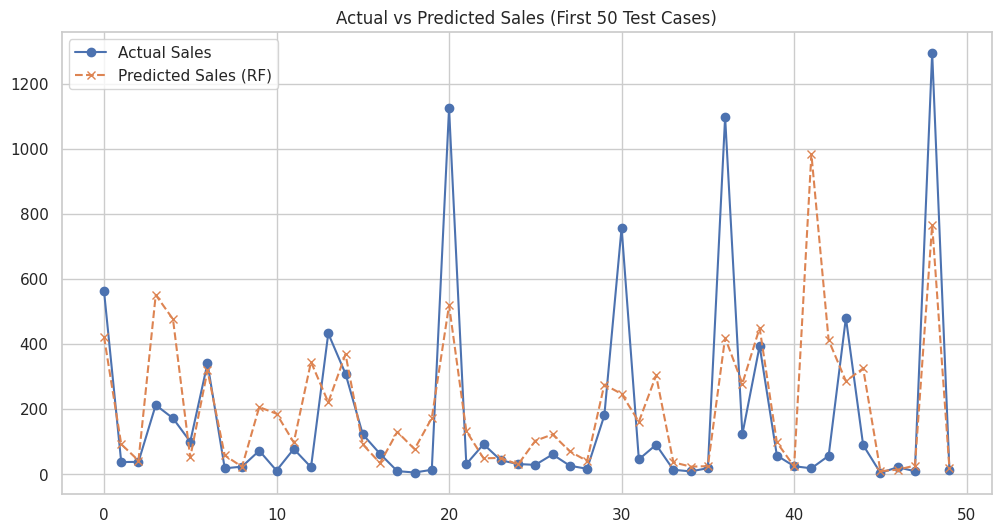

In [24]:
# Plot Actual vs Predicted (First 50 samples for clarity)
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label='Actual Sales', marker='o')
plt.plot(y_pred_rf[:50], label='Predicted Sales (RF)', linestyle='--', marker='x')
plt.title("Actual vs Predicted Sales (First 50 Test Cases)")
plt.legend()
plt.show()

**Feature Importance**

/tmp/ipython-input-936143481.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


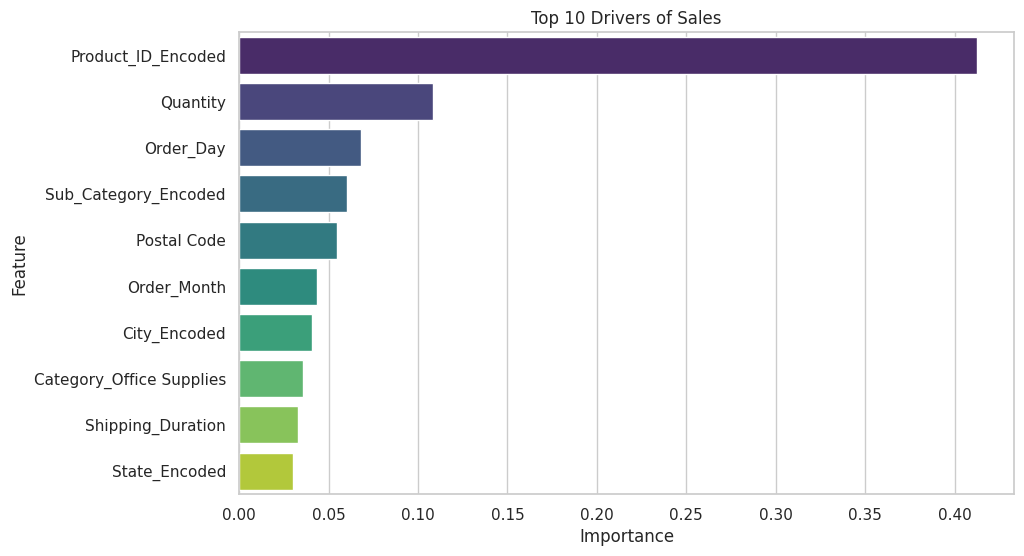

In [25]:
importances = rf_model.feature_importances_
feature_names = X.columns

feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title("Top 10 Drivers of Sales")
plt.show()

In [26]:
from prophet import Prophet

df['Order Date'] = pd.to_datetime(df['Order Date'])

daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

daily_sales.columns = ['ds', 'y']

m = Prophet(interval_width=0.95)
m.fit(daily_sales)

future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('data/forecast_results.csv', index=False)

print("SUCCESS! File saved as 'data/forecast_results.csv'")
print("Columns in file: ds, yhat, yhat_lower, yhat_upper")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


SUCCESS! File saved as 'data/forecast_results.csv'
Columns in file: ds, yhat, yhat_lower, yhat_upper


In [27]:
from google.colab import files
import os

file_path = 'data/forecast_results.csv'

if os.path.exists(file_path):
    files.download(file_path)
    print(f"Downloading '{file_path}'...")
else:
    print(f"Error")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Generate the Data Summary**





In [31]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100

state_profit = df.groupby('State')['Profit'].sum().sort_values()
worst_state = state_profit.index[0]
worst_state_amt = state_profit.iloc[0]
best_state = state_profit.index[-1]

cat_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
top_category = cat_sales.index[0]

future_sales_30d = forecast['yhat'].iloc[:30].mean()

gpt_prompt = f"""
Act as a Senior Data Analyst. Write a concise executive summary (3-4 bullet points) for a Power BI Dashboard based on the following data:

- **Total Historical Sales:** ${total_sales:,.0f}
- **Total Historical Profit:** ${total_profit:,.0f} (Margin: {profit_margin:.1f}%)
- **Top Performing Category:** {top_category}
- **Critical Issue:** The worst performing state is {worst_state} with a loss of ${worst_state_amt:,.0f}.
- **Future Outlook:** The AI forecast predicts an average daily sales volume of ${future_sales_30d:,.0f} for the next 30 days.

Requirements:
1. Highlight the financial health (Profit Margin).
2. Flag the "Critical Issue" as a risk that needs immediate attention.
3. Mention the future outlook.
4. Keep it professional and under 100 words.
"""

print("--- PROMPT GENERATED ---")
print(gpt_prompt)


--- PROMPT GENERATED ---

Act as a Senior Data Analyst. Write a concise executive summary (3-4 bullet points) for a Power BI Dashboard based on the following data:

- **Total Historical Sales:** $2,297,201
- **Total Historical Profit:** $286,397 (Margin: 12.5%)
- **Top Performing Category:** Technology
- **Critical Issue:** The worst performing state is Texas with a loss of $-25,729.
- **Future Outlook:** The AI forecast predicts an average daily sales volume of $917 for the next 30 days.

Requirements:
1. Highlight the financial health (Profit Margin).
2. Flag the "Critical Issue" as a risk that needs immediate attention.
3. Mention the future outlook.
4. Keep it professional and under 100 words.



In [32]:
ai_insight_text = """
EXECUTIVE SUMMARY:
The business generated $2.29M in total historical sales with a profit of $286K, reflecting a 12.5% profit margin, indicating stable financial health.
Technology remains the top-performing category, driving strong revenue contribution.
A critical risk area is Texas, which recorded a loss of $25,729 and requires immediate corrective action.
The AI-driven forecast projects an average daily sales of $917 over the next 30 days, suggesting steady short-term performance.
"""

# Save to a text file
with open('data/ai_insights.txt', 'w') as f:
    f.write(ai_insight_text)

print("Insights saved to data/ai_insights.txt")

Insights saved to data/ai_insights.txt
